In [8]:
# Load modules:
import pandas as pd
import numpy as np
from pprint import pprint as pp
import matplotlib.pyplot as plt

In [9]:
# Load half-processed data:
listings_df = pd.read_csv("datasets/Paris/Paris-processed.csv", index_col = 0)
listings_df.head()

,id,experiences_offered,access,interaction,house_rules,host_since,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,POPTY=House,POPTY=Igloo,POPTY=Loft,POPTY=Other,POPTY=Serviced apartment,POPTY=Timeshare,POPTY=Tipi,POPTY=Townhouse,POPTY=Treehouse,POPTY=Villa
0,3508970,none,Petite précision : 5ème étage sans ascenseur m...,NaN,NaN,2014-07-05,70%,NaN,f,1.0,...,0,0,0,0,0,0,0,0,0,0
1,13222966,none,NaN,NaN,- Respect et propreté :),2014-02-12,NaN,NaN,f,1.0,...,0,0,0,0,0,0,0,0,0,0
2,7337128,none,NaN,NaN,NaN,2013-05-15,100%,NaN,f,1.0,...,0,0,0,0,0,0,0,0,0,0
3,5764597,none,Vous aurez accès à l'ensemble du studio et bal...,NaN,NaN,2014-04-25,100%,NaN,f,1.0,...,0,0,0,0,0,0,0,0,0,0
4,7861852,none,"All equipments can be used by our tenants (TV,...","We'll be glad to help you to discover Paris, a...",NaN,2015-08-14,NaN,NaN,f,1.0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# ====================    Type conversions    ====================
cols_in_currency = [
 'price',
 'weekly_price',
 'monthly_price',
 'security_deposit',
 'cleaning_fee', 
 'extra_people']

# Convert columns in currency to floats:
listings_df[cols_in_currency]=(listings_df[cols_in_currency]
                              .replace( '[\$,)]','', regex=True )
                              .replace( '[(]','-',   regex=True ).astype(float))

cols_in_percentage = [
    'host_response_rate',
    'host_acceptance_rate' ]
listings_df[cols_in_percentage]=(listings_df[cols_in_percentage]
                              .replace( '%','', regex=True ).astype(float))

In [11]:
processed_df = listings_df.drop(
   ['experiences_offered',
    'square_feet',
    'neighbourhood',
    'host_verifications'], axis = 1)

# scale review_scores_rating from 0~100 to 0-10:
processed_df['review_scores_rating'] = listings_df['review_scores_rating']*.1

# drop listings without a single review:
processed_df = processed_df[processed_df.number_of_reviews != 0]

# drop listings with no values in these columns:
processed_df.dropna(subset = ['host_response_rate', 'host_acceptance_rate', 'review_scores_value', 'bathrooms', 'bedrooms', 'beds', 'review_scores_location'], inplace = True)
processed_df.shape

(42365, 148)

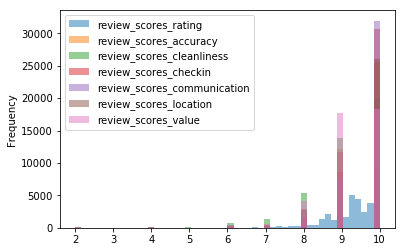

In [12]:
plt.figure()
processed_df[[
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value'
]].plot.hist(alpha =.5, bins=50)
plt.show();

In [13]:
# if no record for 'security_deposit', 'cleaning_fee' is found, assume to be asking for nothing:
processed_df['security_deposit'] = listings_df['security_deposit'].fillna(0)/listings_df.price
processed_df['cleaning_fee'    ] = listings_df['cleaning_fee'    ].fillna(0)/listings_df.price

# convert discounts:
processed_df['monthly_price'] = ((listings_df.price*30-listings_df.monthly_price).fillna(0)/(listings_df.price*30))
processed_df['weekly_price' ] = ((listings_df.price*7 -listings_df.weekly_price ).fillna(0)/(listings_df.price*7 ))

# convert prices of each listings to its ratio compared against the average price in its city:
# [TODO] processed_df.price = listings_df.price/
# rename columns:
processed_df.rename(columns={'monthly_price': 'monthly_discount_percentage', 
                             'weekly_price': 'weekly_discount_percentage',
                             'security_deposit': 'security_deposit_ratio_to_price',
                             'cleaning_fee': 'cleaning_fee_ratio_to_price'
                            }, inplace=True)


In [14]:
processed_df.columns.tolist()

['id',
 'access',
 'interaction',
 'house_rules',
 'host_since',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_listings_count',
 'host_total_listings_count',
 'host_identity_verified',
 'neighbourhood_group_cleansed',
 'city',
 'latitude',
 'longitude',
 'is_location_exact',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'price',
 'weekly_discount_percentage',
 'monthly_discount_percentage',
 'security_deposit_ratio_to_price',
 'cleaning_fee_ratio_to_price',
 'guests_included',
 'extra_people',
 'minimum_nights',
 'maximum_nights',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'number_of_reviews',
 'first_review',
 'last_review',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'requires_license',
 'instant_bookable',
 'cancellation_policy',
 'require_guest_p

In [15]:
print "List of Columns and Numbers of Nulls There:"
null_counts = processed_df.isnull().sum()
print null_counts[null_counts>0]
print "Total amount of entries:", len(processed_df)

List of Columns and Numbers of Nulls There:
access                          18784
interaction                     19854
house_rules                     17532
host_since                          2
host_response_rate               9938
host_acceptance_rate            42365
host_is_superhost                   2
host_listings_count                 2
host_total_listings_count           2
host_identity_verified              2
neighbourhood_group_cleansed    42365
city                               10
bathrooms                         123
bedrooms                          107
beds                               37
first_review                        3
last_review                         1
review_scores_rating              820
review_scores_accuracy            928
review_scores_cleanliness         901
review_scores_checkin             954
review_scores_communication       909
review_scores_location            943
review_scores_value               951
reviews_per_month                   3
dtype:

In [16]:
# Convert boolean columns to binary values:
boolean_columns = ['host_is_superhost', 'host_identity_verified', 'is_location_exact', 'requires_license', 'instant_bookable', 'require_guest_profile_picture', 'require_guest_phone_verification']

processed_df.replace({'t': 1, 'f':0}, inplace = True)

In [17]:
processed_df.loc[:, processed_df.dtypes == object]

,access,interaction,house_rules,host_since,city,first_review,last_review
0,Petite précision : 5ème étage sans ascenseur m...,NaN,NaN,2014-07-05,Paris,2015-07-01,2017-03-19
1,NaN,NaN,- Respect et propreté :),2014-02-12,Paris,2016-06-11,2016-07-29
2,NaN,NaN,NaN,2013-05-15,Paris,2015-07-21,2016-04-30
3,Vous aurez accès à l'ensemble du studio et bal...,NaN,NaN,2014-04-25,Paris,2016-05-21,2017-03-31
4,"All equipments can be used by our tenants (TV,...","We'll be glad to help you to discover Paris, a...",NaN,2015-08-14,Paris,2015-10-13,2015-10-13
5,NaN,NaN,Smoking is allowed only on the window in the l...,2013-11-03,Paris,2016-08-03,2017-03-25
7,NaN,NaN,No Smoking. No pets.,2014-06-24,Paris,2015-04-11,2016-06-27
8,NaN,NaN,NaN,2014-09-02,Paris,2016-02-15,2017-01-10
9,accès à toutes les pièces et équipements,NaN,animaux non autorisés appartement non-fumeur (...,2014-08-06,Paris,2015-04-12,2017-03-05
12,"You will have full access to the flat, you wil...","We are available anytime, by phone, email, or ...",NaN,2016-10-04,Paris,2016-12-23,2017-03-19


In [18]:
cols_in_date = [
    'host_since',
    'first_review',
    'last_review']
airbnb_founded_date = pd.to_datetime('2008-08-01')
for col in cols_in_date:
    processed_df[col] = ((pd.to_datetime(processed_df[col])-airbnb_founded_date) / np.timedelta64(1, 'D')).astype('int')


ValueError: Cannot convert non-finite values (NA or inf) to integer

In [ ]:
processed_df.to_csv('datasets/Paris/Paris-processed2.csv', index=False)